In [1]:
import numpy as np
from scipy import sparse
import src

from jupyterthemes import jtplot
jtplot.style(theme='onedork', context='notebook')

# Перша задача

In [2]:
def generate_matrix(size: int) -> np.matrix:
    matrix = np.zeros((size, size))
    for row in range(size):
        col = size - 1 - row
        if col < row:
            matrix[row, col] = 1
        if col > row:
            matrix[row, col] = -1
    return matrix


In [3]:
sizes = (1_000, 2_000, 5_000, 10_000)
algos = ('Корпелевич', 'Tseng', 'Кеш. Tseng', 'Попов', 'Кеш. Попов', 'Маліцький Tam', 'Кеш. Маліцький Tam')
iters, times = {algo: {} for algo in algos}, {algo: {} for algo in algos}

In [4]:
for size in sizes:
    print(f'Розмір задачі = {size}:')
    a = generate_matrix(size)
    
    print('\tКорпелевич:', end=' ')
    _, iters['Корпелевич'][size], times['Корпелевич'][size] = \
        src.korpelevich(x_initial=np.ones(size), lambda_=0.4,
                        A=lambda x: a.dot(x), ProjectionOntoC=lambda x: x,
                        tolerance=1e-3, max_iterations=1e4, debug=True)

    print('\tTseng:', end=' ')
    _, iters['Tseng'][size], times['Tseng'][size] = \
        src.tseng(x_initial=np.ones(size), lambda_=0.4,
                  A=lambda x: a.dot(x), ProjectionOntoC=lambda x: x,
                  tolerance=1e-3, max_iterations=1e4, debug=True)

    print('\tКеш. Tseng:', end=' ')
    _, iters['Кеш. Tseng'][size], times['Кеш. Tseng'][size] = \
        src.cached_tseng(x_initial=np.ones(size), lambda_=0.4,
                         A=lambda x: a.dot(x), ProjectionOntoC=lambda x: x,
                         tolerance=1e-3, max_iterations=1e4, debug=True)

    print('\tПопов:', end=' ')
    _, iters['Попов'][size], times['Попов'][size] = \
        src.popov(x_initial=np.ones(size), y_initial=np.ones(size), lambda_=0.4,
                  A=lambda x: a.dot(x), ProjectionOntoC=lambda x: x,
                  tolerance=1e-3, max_iterations=1e4, debug=True)

    print('\tКеш. Попов:', end=' ')
    _, iters['Кеш. Попов'][size], times['Кеш. Попов'][size] = \
        src.cached_popov(x_initial=np.ones(size), y_initial=np.ones(size), lambda_=0.4,
                         A=lambda x: a.dot(x), ProjectionOntoC=lambda x: x,
                         tolerance=1e-3, max_iterations=1e4, debug=True)
    
    print('\tМаліцький Tam:', end=' ')
    _, iters['Маліцький Tam'][size], times['Маліцький Tam'][size] = \
        src.malitskyi_tam(x0_initial=np.ones(size), x1_initial=np.ones(size), lambda_=0.4,
                          A=lambda x: a.dot(x), ProjectionOntoC=lambda x: x,
                          tolerance=1e-3, max_iterations=1e4, debug=True)
    
    print('\tКеш. Маліцький Tam:', end=' ')
    _, iters['Кеш. Маліцький Tam'][size], times['Кеш. Маліцький Tam'][size] = \
        src.cached_malitskyi_tam(x0_initial=np.ones(size), x1_initial=np.ones(size), lambda_=0.4,
                                 A=lambda x: a.dot(x), ProjectionOntoC=lambda x: x,
                                 tolerance=1e-3, max_iterations=1e4, debug=True)

    print()

Розмір задачі = 1000:
	Корпелевич: Took 132 iterations and 0.10 seconds to converge.
	Tseng: Took 132 iterations and 0.11 seconds to converge.
	Кеш. Tseng: Took 132 iterations and 0.09 seconds to converge.
	Попов: Took 89 iterations and 0.06 seconds to converge.
	Кеш. Попов: Took 89 iterations and 0.03 seconds to converge.
	Маліцький Tam: Took 91 iterations and 0.09 seconds to converge.
	Кеш. Маліцький Tam: Took 91 iterations and 0.03 seconds to converge.

Розмір задачі = 2000:
	Корпелевич: Took 137 iterations and 0.70 seconds to converge.
	Tseng: Took 137 iterations and 1.01 seconds to converge.
	Кеш. Tseng: Took 137 iterations and 0.72 seconds to converge.
	Попов: Took 92 iterations and 0.54 seconds to converge.
	Кеш. Попов: Took 92 iterations and 0.27 seconds to converge.
	Маліцький Tam: Took 94 iterations and 0.71 seconds to converge.
	Кеш. Маліцький Tam: Took 94 iterations and 0.24 seconds to converge.

Розмір задачі = 5000:
	Корпелевич: Took 144 iterations and 5.23 seconds to con

In [5]:
src.save_values_to_table(times, sizes, fn='1/time',
                         caption='Час виконання, секунд')
src.save_values_to_table(iters, sizes, fn='1/iter',
                         caption='Число ітерацій')

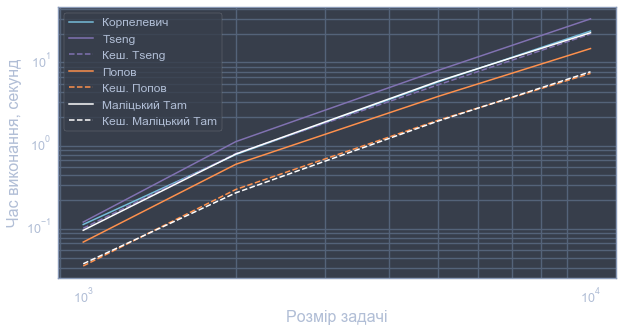

In [6]:
src.save_values_to_image(times, sizes, fn='1/time',
                         styles=('c-', 'm-', 'm--', 'y-', 'y--', 'w-', 'w--'),
                         title='Час виконання, секунд')

# Розріджені матриці

In [7]:
def generate_sparse_matrix(size: int) -> np.matrix:
    data, rows, cols = [], [], []
    for row in range(size):
        rows.append(row)
        col = size - 1 - row
        cols.append(col)
        if col < row:
            data.append(1)
        if col > row:
            data.append(-1)
    return sparse.coo_matrix((data, (rows, cols)), shape=(size, size))


In [8]:
sizes = (50_000, 100_000, 200_000, 500_000)
algos = ('Корпелевич', 'Tseng', 'Кеш. Tseng', 'Попов', 'Кеш. Попов', 'Маліцький Tam', 'Кеш. Маліцький Tam')
iters, times = {algo: {} for algo in algos}, {algo: {} for algo in algos}

In [9]:
for size in sizes:
    print(f'Розмір задачі = {size}:')
    a = generate_sparse_matrix(size)

    print('\tКорпелевич:', end=' ')
    _, iters['Корпелевич'][size], times['Корпелевич'][size] = \
        src.korpelevich(x_initial=np.ones(size), lambda_=0.4,
                        A=lambda x: a.dot(x), ProjectionOntoC=lambda x: x,
                        tolerance=1e-3, max_iterations=1e4, debug=True)

    print('\tTseng:', end=' ')
    _, iters['Tseng'][size], times['Tseng'][size] = \
        src.tseng(x_initial=np.ones(size), lambda_=0.4,
                  A=lambda x: a.dot(x), ProjectionOntoC=lambda x: x,
                  tolerance=1e-3, max_iterations=1e4, debug=True)

    print('\tКеш. Tseng:', end=' ')
    _, iters['Кеш. Tseng'][size], times['Кеш. Tseng'][size] = \
        src.cached_tseng(x_initial=np.ones(size), lambda_=0.4,
                         A=lambda x: a.dot(x), ProjectionOntoC=lambda x: x,
                         tolerance=1e-3, max_iterations=1e4, debug=True)
    
    print('\tPopov:', end=' ')
    _, iters['Попов'][size], times['Попов'][size] = \
        src.popov(x_initial=np.ones(size), y_initial=np.ones(size), lambda_=0.4,
                  A=lambda x: a.dot(x), ProjectionOntoC=lambda x: x,
                  tolerance=1e-3, max_iterations=1e4, debug=True)

    print('\tКеш. Попов:', end=' ')
    _, iters['Кеш. Попов'][size], times['Кеш. Попов'][size] = \
        src.cached_popov(x_initial=np.ones(size), y_initial=np.ones(size), lambda_=0.4,
                         A=lambda x: a.dot(x), ProjectionOntoC=lambda x: x,
                         tolerance=1e-3, max_iterations=1e4, debug=True)
    
    print('\tМаліцький Tam:', end=' ')
    _, iters['Маліцький Tam'][size], times['Маліцький Tam'][size] = \
        src.malitskyi_tam(x0_initial=np.ones(size), x1_initial=np.ones(size), lambda_=0.4,
                          A=lambda x: a.dot(x), ProjectionOntoC=lambda x: x,
                          tolerance=1e-3, max_iterations=1e4, debug=True)
    
    print('\tКеш. Маліцький Tam:', end=' ')
    _, iters['Кеш. Маліцький Tam'][size], times['Кеш. Маліцький Tam'][size] = \
        src.cached_malitskyi_tam(x0_initial=np.ones(size), x1_initial=np.ones(size), lambda_=0.4,
                                 A=lambda x: a.dot(x), ProjectionOntoC=lambda x: x,
                                 tolerance=1e-3, max_iterations=1e4, debug=True)
    
    print()


Розмір задачі = 50000:
	Корпелевич: Took 159 iterations and 0.07 seconds to converge.
	Tseng: Took 159 iterations and 0.13 seconds to converge.
	Кеш. Tseng: Took 159 iterations and 0.09 seconds to converge.
	Popov: Took 106 iterations and 0.06 seconds to converge.
	Кеш. Попов: Took 106 iterations and 0.04 seconds to converge.
	Маліцький Tam: Took 108 iterations and 0.07 seconds to converge.
	Кеш. Маліцький Tam: Took 108 iterations and 0.04 seconds to converge.

Розмір задачі = 100000:
	Корпелевич: Took 164 iterations and 0.23 seconds to converge.
	Tseng: Took 164 iterations and 0.53 seconds to converge.
	Кеш. Tseng: Took 164 iterations and 0.24 seconds to converge.
	Popov: Took 109 iterations and 0.12 seconds to converge.
	Кеш. Попов: Took 109 iterations and 0.25 seconds to converge.
	Маліцький Tam: Took 111 iterations and 0.26 seconds to converge.
	Кеш. Маліцький Tam: Took 111 iterations and 0.10 seconds to converge.

Розмір задачі = 200000:
	Корпелевич: Took 169 iterations and 2.23 s

In [10]:
src.save_values_to_table(times, sizes, fn='1/sparse/time',
                         caption='Час виконання, секунд')
src.save_values_to_table(iters, sizes, fn='1/sparse/iter',
                         caption='Число ітерацій')

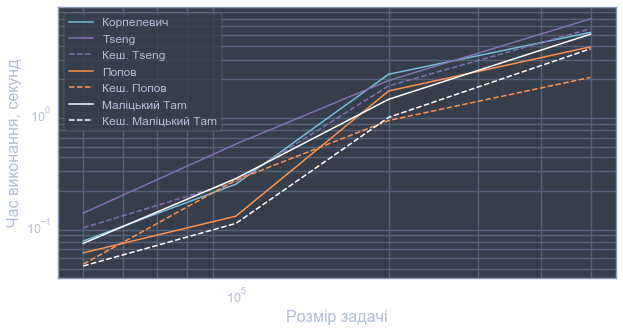

In [11]:
src.save_values_to_image(times, sizes, fn='1/sparse/time',
                         styles=('c-', 'm-', 'm--', 'y-', 'y--', 'w-', 'w--'),
                         title='Час виконання, секунд')

# Друга задача

In [12]:
def generate_random_matrix(size: int) -> np.matrix:
    a = np.random.uniform(-5, 5, (size, size))
    b = np.random.uniform(-5, 5, (size, size))
    # skew-symmetric
    for row in range(size):
        for col in range(row):
            b[col, row] = -b[row, col]
    d = np.diag(np.random.uniform(0, .3, size))
    q = np.random.uniform(-500, 0, size)
    return a.dot(a.T) + b + d, q


In [13]:
def ProjectionOntoProbabilitySymplex(x: np.array) -> np.array:
    dimensionality = x.shape[0]
    x /= dimensionality
    sorted_x = np.flip(np.sort(x))
    prefix_sum = np.cumsum(sorted_x)
    to_compare = sorted_x + (1 - prefix_sum) / np.arange(1, dimensionality + 1)
    k = 0
    for j in range(1, dimensionality):
        if to_compare[j] > 0:
            k = j
    return dimensionality * np.maximum(np.zeros(dimensionality), x + (to_compare[k] - sorted_x[k]))

In [14]:
sizes = (100, 200, 500, 1000)
algos = ('Корпелевич', 'Tseng', 'Кеш. Tseng', 'Попов', 'Кеш. Попов', 'Маліцький Tam', 'Кеш. Маліцький Tam')
iters, times = {algo: {} for algo in algos}, {algo: {} for algo in algos}

In [15]:
for size in sizes:
    print(f'Розмір задачі = {size}:')

    for algo in algos:
        iters[algo][size] = []
        times[algo][size] = []
 
    for _ in range(5):
        print(f'\tTry #{_ + 1}:')

        np.random.seed(_)
        M, q = generate_random_matrix(size)

        print('\t\tКорпелевич:', end=' ')
        _, iter_, time_ = src.korpelevich(
            x_initial=np.ones(size), lambda_=.4/np.linalg.norm(M),
            A=lambda x: M.dot(x) + q, ProjectionOntoC=ProjectionOntoProbabilitySymplex,
            tolerance=1e-3, max_iterations=1e4, debug=True)
        iters['Корпелевич'][size].append(iter_)
        times['Корпелевич'][size].append(time_)

        print('\t\tTseng:', end=' ')
        _, iter_, time_ = src.tseng(
            x_initial=np.ones(size), lambda_=.4/np.linalg.norm(M),
            A=lambda x: M.dot(x) + q, ProjectionOntoC=ProjectionOntoProbabilitySymplex,
            tolerance=1e-3, max_iterations=1e4, debug=True)
        iters['Tseng'][size].append(iter_)
        times['Tseng'][size].append(time_)

        print('\t\tКеш. Tseng:', end=' ')
        _, iter_, time_ = src.cached_tseng(
            x_initial=np.ones(size), lambda_=.4/np.linalg.norm(M),
            A=lambda x: M.dot(x) + q, ProjectionOntoC=ProjectionOntoProbabilitySymplex,
            tolerance=1e-3, max_iterations=1e4, debug=True)
        iters['Кеш. Tseng'][size].append(iter_)
        times['Кеш. Tseng'][size].append(time_)

        print('\t\tПопов:', end=' ')
        _, iter_, time_ = src.popov(
            x_initial=np.ones(size), y_initial=np.ones(size), lambda_=.4/np.linalg.norm(M),
            A=lambda x: M.dot(x) + q, ProjectionOntoC=ProjectionOntoProbabilitySymplex,
            tolerance=1e-3, max_iterations=1e4, debug=True)
        iters['Попов'][size].append(iter_)
        times['Попов'][size].append(time_)

        print('\t\tКеш. Попов:', end=' ')
        _, iter_, time_ = src.cached_popov(
            x_initial=np.ones(size), y_initial=np.ones(size), lambda_=.4/np.linalg.norm(M),
            A=lambda x: M.dot(x) + q, ProjectionOntoC=ProjectionOntoProbabilitySymplex,
            tolerance=1e-3, max_iterations=1e4, debug=True)
        iters['Кеш. Попов'][size].append(iter_)
        times['Кеш. Попов'][size].append(time_)

        print('\t\tМаліцький Tam:', end=' ')
        _, iter_, time_ = src.malitskyi_tam(
            x0_initial=np.ones(size), x1_initial=np.ones(size), lambda_=.4/np.linalg.norm(M),
            A=lambda x: M.dot(x) + q, ProjectionOntoC=ProjectionOntoProbabilitySymplex,
            tolerance=1e-3, max_iterations=1e4, debug=True)
        iters['Маліцький Tam'][size].append(iter_)
        times['Маліцький Tam'][size].append(time_)

        print('\t\tКеш. Маліцький Tam:', end=' ')
        _, iter_, time_ = src.cached_malitskyi_tam(
            x0_initial=np.ones(size), x1_initial=np.ones(size), lambda_=.4/np.linalg.norm(M),
            A=lambda x: M.dot(x) + q, ProjectionOntoC=ProjectionOntoProbabilitySymplex,
            tolerance=1e-3, max_iterations=1e4, debug=True)
        iters['Кеш. Маліцький Tam'][size].append(iter_)
        times['Кеш. Маліцький Tam'][size].append(time_)
        
        print()

    print()

Розмір задачі = 100:
	Try #1:
		Корпелевич: Took 967 iterations and 0.29 seconds to converge.
		Tseng: Took 967 iterations and 0.24 seconds to converge.
		Кеш. Tseng: Took 967 iterations and 0.18 seconds to converge.
		Попов: Took 967 iterations and 0.25 seconds to converge.
		Кеш. Попов: Took 967 iterations and 0.19 seconds to converge.
		Маліцький Tam: Took 967 iterations and 0.23 seconds to converge.
		Кеш. Маліцький Tam: Took 967 iterations and 0.14 seconds to converge.

	Try #2:
		Корпелевич: Took 1151 iterations and 0.33 seconds to converge.
		Tseng: Took 1151 iterations and 0.56 seconds to converge.
		Кеш. Tseng: Took 1151 iterations and 0.46 seconds to converge.
		Попов: Took 1151 iterations and 0.64 seconds to converge.
		Кеш. Попов: Took 1151 iterations and 0.52 seconds to converge.
		Маліцький Tam: Took 1151 iterations and 0.56 seconds to converge.
		Кеш. Маліцький Tam: Took 1151 iterations and 0.41 seconds to converge.

	Try #3:
		Корпелевич: Took 1086 iterations and 0.40 s

		Попов: Took 3471 iterations and 7.35 seconds to converge.
		Кеш. Попов: Took 3471 iterations and 6.53 seconds to converge.
		Маліцький Tam: Took 3471 iterations and 6.88 seconds to converge.
		Кеш. Маліцький Tam: Took 3471 iterations and 3.60 seconds to converge.

	Try #4:
		Корпелевич: Took 3918 iterations and 8.96 seconds to converge.
		Tseng: Took 3918 iterations and 7.30 seconds to converge.
		Кеш. Tseng: Took 3918 iterations and 5.54 seconds to converge.
		Попов: Took 3918 iterations and 8.34 seconds to converge.
		Кеш. Попов: Took 3918 iterations and 7.24 seconds to converge.
		Маліцький Tam: Took 3918 iterations and 8.29 seconds to converge.
		Кеш. Маліцький Tam: Took 3918 iterations and 4.30 seconds to converge.

	Try #5:
		Корпелевич: Took 3907 iterations and 9.63 seconds to converge.
		Tseng: Took 3907 iterations and 6.91 seconds to converge.
		Кеш. Tseng: Took 3907 iterations and 8.95 seconds to converge.
		Попов: Took 3907 iterations and 8.29 seconds to converge.
		Кеш. П

In [16]:
for algo in algos:
    for size in sizes:
        iters[algo][size] = (int(np.mean(iters[algo][size])), int(np.std(iters[algo][size])))
        times[algo][size] = (np.mean(times[algo][size]), np.std(times[algo][size]))

In [17]:
src.save_intervals_to_table(times, sizes, fn='2/time',
                            caption='Час виконання, секунд')
src.save_intervals_to_table(iters, sizes, fn='2/iter',
                            caption='Число ітерацій')

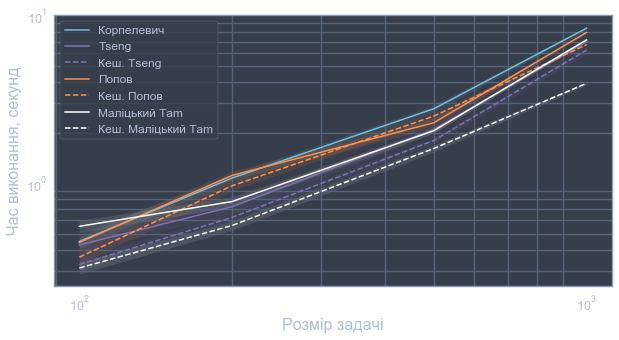

In [18]:
src.save_intervals_to_image(times, sizes, fn='2/time',
                            styles=('c-', 'm-', 'm--', 'y-', 'y--', 'w-', 'w--'),
                            title='Час виконання, секунд')

# Адаптивні алгоритми

In [19]:
sizes = (1_000, 2_000, 5_000, 10_000)
algos = ('Адапт. Корпелевич', 'Кеш. адапт. Корпелевич',
         'Адапт. Tseng', 'Кеш. адапт. Tseng',
         'Адапт. Попов', 'Кеш. адапт. Попов',
         'Адапт. Маліцький Tam', 'Кеш. адапт. Маліцький Tam')
iters, times = {algo: {} for algo in algos}, {algo: {} for algo in algos}

In [20]:
for size in sizes:
    print(f'Розмір задачі = {size}:')
    a = generate_matrix(size)

    print('\tАдапт. Корпелевич:', end=' ')
    _, iters['Адапт. Корпелевич'][size], times['Адапт. Корпелевич'][size] = \
          src.adaptive_korpelevich(x_initial=np.ones(size), tau=.4, lambda_initial=1,
                                   A=lambda x: a.dot(x), ProjectionOntoC=lambda x: x,
                                   tolerance=1e-3, max_iterations=1e4, debug=True)

    print('\tКеш. адапт. Корпелевич:', end=' ')
    _, iters['Кеш. адапт. Корпелевич'][size], times['Кеш. адапт. Корпелевич'][size] = \
          src.cached_adaptive_korpelevich(x_initial=np.ones(size), tau=.4, lambda_initial=1,
                                          A=lambda x: a.dot(x), ProjectionOntoC=lambda x: x,
                                          tolerance=1e-3, max_iterations=1e4, debug=True)

    print('\tАдапт. Tseng:', end=' ')
    _, iters['Адапт. Tseng'][size], times['Адапт. Tseng'][size] = \
          src.adaptive_tseng(x_initial=np.ones(size), tau=.4, lambda_initial=1,
                             A=lambda x: a.dot(x), ProjectionOntoC=lambda x: x,
                             tolerance=1e-3, max_iterations=1e4, debug=True)

    print('\tКеш. адапт. Tseng:', end=' ')
    _, iters['Кеш. адапт. Tseng'][size], times['Кеш. адапт. Tseng'][size] = \
          src.cached_adaptive_tseng(x_initial=np.ones(size), tau=.4, lambda_initial=1,
                                    A=lambda x: a.dot(x), ProjectionOntoC=lambda x: x,
                                    tolerance=1e-3, max_iterations=1e4, debug=True)

    print('\tАдапт. Попов:', end=' ')
    _, iters['Адапт. Попов'][size], times['Адапт. Попов'][size] = \
          src.adaptive_popov(x_initial=np.ones(size), y_initial=np.ones(size),
                             tau=.4, lambda_initial=1,
                             A=lambda x: a.dot(x), ProjectionOntoC=lambda x: x,
                             tolerance=1e-3, max_iterations=1e4, debug=True)

    print('\tКеш. адапт. Попов:', end=' ')
    _, iters['Кеш. адапт. Попов'][size], times['Кеш. адапт. Попов'][size] = \
          src.cached_adaptive_popov(x_initial=np.ones(size), y_initial=np.ones(size),
                                    tau=.4, lambda_initial=1,
                                    A=lambda x: a.dot(x), ProjectionOntoC=lambda x: x,
                                    tolerance=1e-3, max_iterations=1e4, debug=True)

    print('\tАдапт. Маліцький Tam:', end=' ')
    _, iters['Адапт. Маліцький Tam'][size], times['Адапт. Маліцький Tam'][size] = \
          src.adaptive_malitskyi_tam(x0_initial=np.ones(size), x1_initial=np.ones(size),
                                     tau=.4, lambda0_initial=1, lambda1_initial=1,
                                     A=lambda x: a.dot(x), ProjectionOntoC=lambda x: x,
                                     tolerance=1e-3, max_iterations=1e4, debug=True)

    print('\tКеш. адапт. Маліцький Tam:', end=' ')
    _, iters['Кеш. адапт. Маліцький Tam'][size], times['Кеш. адапт. Маліцький Tam'][size] = \
          src.cached_adaptive_malitskyi_tam(x0_initial=np.ones(size), x1_initial=np.ones(size),
                                            tau=.4, lambda0_initial=1, lambda1_initial=1,
                                            A=lambda x: a.dot(x), ProjectionOntoC=lambda x: x,
                                            tolerance=1e-3, max_iterations=1e4, debug=True)
    
    print()


Розмір задачі = 1000:
	Адапт. Корпелевич: Took 133 iterations and 0.18 seconds to converge.
	Кеш. адапт. Корпелевич: Took 133 iterations and 0.07 seconds to converge.
	Адапт. Tseng: Took 133 iterations and 0.19 seconds to converge.
	Кеш. адапт. Tseng: Took 133 iterations and 0.09 seconds to converge.
	Адапт. Попов: Took 90 iterations and 0.12 seconds to converge.
	Кеш. адапт. Попов: Took 90 iterations and 0.03 seconds to converge.
	Адапт. Маліцький Tam: Took 92 iterations and 0.14 seconds to converge.
	Кеш. адапт. Маліцький Tam: Took 92 iterations and 0.03 seconds to converge.

Розмір задачі = 2000:
	Адапт. Корпелевич: Took 138 iterations and 1.77 seconds to converge.
	Кеш. адапт. Корпелевич: Took 138 iterations and 0.59 seconds to converge.
	Адапт. Tseng: Took 138 iterations and 2.18 seconds to converge.
	Кеш. адапт. Tseng: Took 138 iterations and 0.71 seconds to converge.
	Адапт. Попов: Took 93 iterations and 1.27 seconds to converge.
	Кеш. адапт. Попов: Took 93 iterations and 0.21 s

In [21]:
src.save_values_to_table(times, sizes, fn='1/adapt/time',
                         caption='Час виконання, секунд')
src.save_values_to_table(iters, sizes, fn='1/adapt/iter',
                         caption='Число ітерацій')

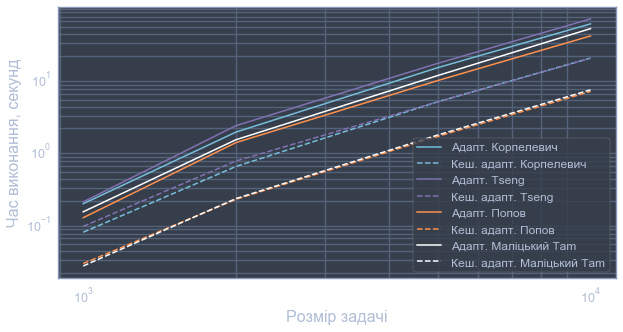

In [22]:
src.save_values_to_image(times, sizes, fn='1/adapt/time',
                         styles=('c-', 'c--', 'm-', 'm--', 'y-', 'y--', 'w-', 'w--'),
                         title='Час виконання, секунд')

In [23]:
sizes = (50_000, 100_000, 200_000, 500_000)
algos = ('Адапт. Корпелевич', 'Кеш. адапт. Корпелевич',
         'Адапт. Tseng', 'Кеш. адапт. Tseng',
         'Адапт. Попов', 'Кеш. адапт. Попов',
         'Адапт. Маліцький Tam', 'Кеш. адапт. Маліцький Tam')
iters, times = {algo: {} for algo in algos}, {algo: {} for algo in algos}

In [24]:
for size in sizes:
    print(f'Розмір задачі = {size}:')
    a = generate_sparse_matrix(size)

    print('\tАдапт. Корпелевич:', end=' ')
    _, iters['Адапт. Корпелевич'][size], times['Адапт. Корпелевич'][size] = \
          src.adaptive_korpelevich(x_initial=np.ones(size), tau=.4, lambda_initial=1,
                                   A=lambda x: a.dot(x), ProjectionOntoC=lambda x: x,
                                   tolerance=1e-3, max_iterations=1e4, debug=True)

    print('\tКеш. адапт. Корпелевич:', end=' ')
    _, iters['Кеш. адапт. Корпелевич'][size], times['Кеш. адапт. Корпелевич'][size] = \
          src.cached_adaptive_korpelevich(x_initial=np.ones(size), tau=.4, lambda_initial=1,
                                          A=lambda x: a.dot(x), ProjectionOntoC=lambda x: x,
                                          tolerance=1e-3, max_iterations=1e4, debug=True)

    print('\tАдапт. Tseng:', end=' ')
    _, iters['Адапт. Tseng'][size], times['Адапт. Tseng'][size] = \
          src.adaptive_tseng(x_initial=np.ones(size), tau=.4, lambda_initial=1,
                             A=lambda x: a.dot(x), ProjectionOntoC=lambda x: x,
                             tolerance=1e-3, max_iterations=1e4, debug=True)

    print('\tКеш. адапт. Tseng:', end=' ')
    _, iters['Кеш. адапт. Tseng'][size], times['Кеш. адапт. Tseng'][size] = \
          src.cached_adaptive_tseng(x_initial=np.ones(size), tau=.4, lambda_initial=1,
                                    A=lambda x: a.dot(x), ProjectionOntoC=lambda x: x,
                                    tolerance=1e-3, max_iterations=1e4, debug=True)

    print('\tАдапт. Попов:', end=' ')
    _, iters['Адапт. Попов'][size], times['Адапт. Попов'][size] = \
          src.adaptive_popov(x_initial=np.ones(size), y_initial=np.ones(size),
                             tau=.4, lambda_initial=1,
                             A=lambda x: a.dot(x), ProjectionOntoC=lambda x: x,
                             tolerance=1e-3, max_iterations=1e4, debug=True)

    print("\tКеш. адапт. Попов: ", end="")
    _, iters['Кеш. адапт. Попов'][size], times['Кеш. адапт. Попов'][size] = \
          src.cached_adaptive_popov(x_initial=np.ones(size), y_initial=np.ones(size),
                                    tau=.4, lambda_initial=1,
                                    A=lambda x: a.dot(x), ProjectionOntoC=lambda x: x,
                                    tolerance=1e-3, max_iterations=1e4, debug=True)

    print('\tАдапт. Маліцький Tam:', end=' ')
    _, iters['Адапт. Маліцький Tam'][size], times['Адапт. Маліцький Tam'][size] = \
          src.adaptive_malitskyi_tam(x0_initial=np.ones(size), x1_initial=np.ones(size),
                                     tau=.4, lambda0_initial=1, lambda1_initial=1,
                                     A=lambda x: a.dot(x), ProjectionOntoC=lambda x: x,
                                     tolerance=1e-3, max_iterations=1e4, debug=True)

    print('\tКеш. адапт. Маліцький Tam:', end=' ')
    _, iters['Кеш. адапт. Маліцький Tam'][size], times['Кеш. адапт. Маліцький Tam'][size] = \
          src.cached_adaptive_malitskyi_tam(x0_initial=np.ones(size), x1_initial=np.ones(size),
                                            tau=.4, lambda0_initial=1, lambda1_initial=1,
                                            A=lambda x: a.dot(x), ProjectionOntoC=lambda x: x,
                                            tolerance=1e-3, max_iterations=1e4, debug=True)
    
    print()


Розмір задачі = 50000:
	Адапт. Корпелевич: Took 160 iterations and 0.27 seconds to converge.
	Кеш. адапт. Корпелевич: Took 160 iterations and 0.11 seconds to converge.
	Адапт. Tseng: Took 160 iterations and 0.20 seconds to converge.
	Кеш. адапт. Tseng: Took 160 iterations and 0.11 seconds to converge.
	Адапт. Попов: Took 108 iterations and 0.24 seconds to converge.
	Кеш. адапт. Попов: Took 108 iterations and 0.07 seconds to converge.
	Адапт. Маліцький Tam: Took 110 iterations and 0.14 seconds to converge.
	Кеш. адапт. Маліцький Tam: Took 110 iterations and 0.09 seconds to converge.

Розмір задачі = 100000:
	Адапт. Корпелевич: Took 165 iterations and 0.95 seconds to converge.
	Кеш. адапт. Корпелевич: Took 165 iterations and 1.07 seconds to converge.
	Адапт. Tseng: Took 165 iterations and 1.20 seconds to converge.
	Кеш. адапт. Tseng: Took 165 iterations and 0.62 seconds to converge.
	Адапт. Попов: Took 111 iterations and 0.68 seconds to converge.
	Кеш. адапт. Попов: Took 111 iterations a

In [25]:
src.save_values_to_table(times, sizes, fn='1/sparse/adapt/time',
                         caption='Час виконання, секунд')
src.save_values_to_table(iters, sizes, fn='1/sparse/adapt/iter',
                         caption='Число ітерацій')

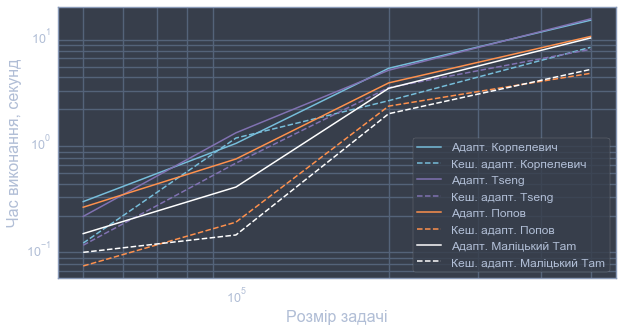

In [26]:
src.save_values_to_image(times, sizes, fn='1/sparse/adapt/time',
                         styles=('c-', 'c--', 'm-', 'm--', 'y-', 'y--', 'w-', 'w--'),
                         title='Час виконання, секунд')

In [27]:
sizes = (100, 200, 500, 1000)
algos = ('Адапт. Корпелевич', 'Кеш. адапт. Корпелевич',
         'Адапт. Tseng', 'Кеш. адапт. Tseng',
         'Адапт. Попов', 'Кеш. адапт. Попов',
         'Адапт. Маліцький Tam', 'Кеш. адапт. Маліцький Tam')
iters, times = {algo: {} for algo in algos}, {algo: {} for algo in algos}

In [28]:
for size in sizes:
    print(f'Розмір задачі = {size}:')

    for algo in algos:
        iters[algo][size] = []
        times[algo][size] = []
 
    for _ in range(5):
        print(f'\tTry #{_ + 1}:')

        np.random.seed(_)
        M, q = generate_random_matrix(size)
        
        print('\t\tАдапт. Корпелевич:', end=' ')
        _, iter_, time_ = src.adaptive_korpelevich(
            x_initial=np.ones(size), tau=.4, lambda_initial=1,
            A=lambda x: M.dot(x) + q, ProjectionOntoC=ProjectionOntoProbabilitySymplex,
            tolerance=1e-3, max_iterations=1e4, debug=True)
        iters['Адапт. Корпелевич'][size].append(iter_)
        times['Адапт. Корпелевич'][size].append(time_)

        print('\t\tКеш. адапт. Корпелевич:', end=' ')
        _, iter_, time_ = src.cached_adaptive_korpelevich(
            x_initial=np.ones(size), tau=.4, lambda_initial=1,
            A=lambda x: M.dot(x) + q, ProjectionOntoC=ProjectionOntoProbabilitySymplex,
            tolerance=1e-3, max_iterations=1e4, debug=True)
        iters['Кеш. адапт. Корпелевич'][size].append(iter_)
        times['Кеш. адапт. Корпелевич'][size].append(time_)

        print('\t\tАдапт. Tseng:', end=' ')
        _, iter_, time_ = src.adaptive_tseng(
            x_initial=np.ones(size), tau=.4, lambda_initial=1,
            A=lambda x: M.dot(x) + q, ProjectionOntoC=ProjectionOntoProbabilitySymplex,
            tolerance=1e-3, max_iterations=1e4, debug=True)
        iters['Адапт. Tseng'][size].append(iter_)
        times['Адапт. Tseng'][size].append(time_)

        print('\t\tКеш. адапт. Tseng:', end=' ')
        _, iter_, time_ = src.cached_adaptive_tseng(
            x_initial=np.ones(size), tau=.4, lambda_initial=1,
            A=lambda x: M.dot(x) + q, ProjectionOntoC=ProjectionOntoProbabilitySymplex,
            tolerance=1e-3, max_iterations=1e4, debug=True)
        iters['Кеш. адапт. Tseng'][size].append(iter_)
        times['Кеш. адапт. Tseng'][size].append(time_)

        print('\t\tАдапт. Попов:', end=' ')
        _, iter_, time_ = src.adaptive_popov(
            x_initial=np.ones(size), y_initial=np.ones(size), tau=.4, lambda_initial=1,
            A=lambda x: M.dot(x) + q, ProjectionOntoC=ProjectionOntoProbabilitySymplex,
            tolerance=1e-3, max_iterations=1e4, debug=True)
        iters['Адапт. Попов'][size].append(iter_)
        times['Адапт. Попов'][size].append(time_)

        print('\t\tКеш. адапт. Попов:', end=' ')
        _, iter_, time_ = src.cached_adaptive_popov(
            x_initial=np.ones(size), y_initial=np.ones(size), tau=.4, lambda_initial=1,
            A=lambda x: M.dot(x) + q, ProjectionOntoC=ProjectionOntoProbabilitySymplex,
            tolerance=1e-3, max_iterations=1e4, debug=True)
        iters['Кеш. адапт. Попов'][size].append(iter_)
        times['Кеш. адапт. Попов'][size].append(time_)

        print('\t\tАдапт. Маліцький Tam:', end=' ')
        _, iter_, time_ = src.adaptive_malitskyi_tam(
            x0_initial=np.ones(size), x1_initial=np.ones(size),
            tau=.4, lambda0_initial=1, lambda1_initial=1,
            A=lambda x: M.dot(x) + q, ProjectionOntoC=ProjectionOntoProbabilitySymplex,
            tolerance=1e-3, max_iterations=1e4, debug=True)
        iters['Адапт. Маліцький Tam'][size].append(iter_)
        times['Адапт. Маліцький Tam'][size].append(time_)

        print('\t\tКеш. адапт. Маліцький Tam:', end=' ')
        _, iter_, time_ = src.cached_adaptive_malitskyi_tam(
            x0_initial=np.ones(size), x1_initial=np.ones(size),
            tau=.4, lambda0_initial=1, lambda1_initial=1,
            A=lambda x: M.dot(x) + q, ProjectionOntoC=ProjectionOntoProbabilitySymplex,
            tolerance=1e-3, max_iterations=1e4, debug=True)
        iters['Кеш. адапт. Маліцький Tam'][size].append(iter_)
        times['Кеш. адапт. Маліцький Tam'][size].append(time_)

        print()

    print()

Розмір задачі = 100:
	Try #1:
		Адапт. Корпелевич: Took 253 iterations and 0.28 seconds to converge.
		Кеш. адапт. Корпелевич: Took 253 iterations and 0.17 seconds to converge.
		Адапт. Tseng: Took 432 iterations and 0.42 seconds to converge.
		Кеш. адапт. Tseng: Took 432 iterations and 0.22 seconds to converge.
		Адапт. Попов: Took 349 iterations and 0.37 seconds to converge.
		Кеш. адапт. Попов: Took 349 iterations and 0.18 seconds to converge.
		Адапт. Маліцький Tam: Took 464 iterations and 0.46 seconds to converge.
		Кеш. адапт. Маліцький Tam: Took 464 iterations and 0.18 seconds to converge.

	Try #2:
		Адапт. Корпелевич: Took 305 iterations and 0.32 seconds to converge.
		Кеш. адапт. Корпелевич: Took 305 iterations and 0.12 seconds to converge.
		Адапт. Tseng: Took 530 iterations and 0.23 seconds to converge.
		Кеш. адапт. Tseng: Took 530 iterations and 0.11 seconds to converge.
		Адапт. Попов: Took 451 iterations and 0.21 seconds to converge.
		Кеш. адапт. Попов: Took 451 iterat

		Кеш. адапт. Маліцький Tam: Took 572 iterations and 0.20 seconds to converge.

	Try #5:
		Адапт. Корпелевич: Took 379 iterations and 0.34 seconds to converge.
		Кеш. адапт. Корпелевич: Took 379 iterations and 0.24 seconds to converge.
		Адапт. Tseng: Took 813 iterations and 1.00 seconds to converge.
		Кеш. адапт. Tseng: Took 813 iterations and 0.77 seconds to converge.
		Адапт. Попов: Took 507 iterations and 1.00 seconds to converge.
		Кеш. адапт. Попов: Took 507 iterations and 0.65 seconds to converge.
		Адапт. Маліцький Tam: Took 621 iterations and 0.93 seconds to converge.
		Кеш. адапт. Маліцький Tam: Took 621 iterations and 0.47 seconds to converge.


Розмір задачі = 1000:
	Try #1:
		Адапт. Корпелевич: Took 476 iterations and 1.82 seconds to converge.
		Кеш. адапт. Корпелевич: Took 476 iterations and 1.02 seconds to converge.
		Адапт. Tseng: Took 1048 iterations and 3.54 seconds to converge.
		Кеш. адапт. Tseng: Took 1048 iterations and 1.66 seconds to converge.
		Адапт. Попов: To

In [29]:
for algo in algos:
    for size in sizes:
        iters[algo][size] = (int(np.mean(iters[algo][size])), int(np.std(iters[algo][size])))
        times[algo][size] = (np.mean(times[algo][size]), np.std(times[algo][size]))

In [30]:
src.save_intervals_to_table(times, sizes, fn='2/adapt/time',
                            caption='Час виконання, секунд')
src.save_intervals_to_table(iters, sizes, fn='2/adapt/iter',
                            caption='Число ітерацій')

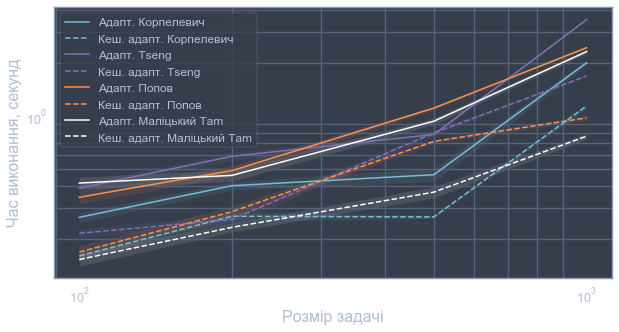

In [31]:
src.save_intervals_to_image(times, sizes, fn='2/adapt/time',
                            styles=('c-', 'c--', 'm-', 'm--', 'y-', 'y--', 'w-', 'w--'),
                            title='Час виконання, секунд')

# Задача 4

In [32]:
def generate_tridiagonal_matrix(size: int) -> np.matrix:
    d = np.zeros((size, size))
    for row in range(size):
        d[row, row] = 4
        if row != 0:
            d[row, row - 1] = 1
        if row + 1 != size:
            d[row, row + 1] = -2
    c = -np.ones(size)
    return d, c

In [33]:
sizes = (500, 1_000, 2_000, 5_000)
algos = ('Адапт. Корпелевич', 'Кеш. адапт. Корпелевич',
         'Адапт. Tseng', 'Кеш. адапт. Tseng',
         'Адапт. Попов', 'Кеш. адапт. Попов',
         'Адапт. Маліцький Tam', 'Кеш. адапт. Маліцький Tam')
iters, times = {algo: {} for algo in algos}, {algo: {} for algo in algos}

In [34]:
for size in sizes:
    print(f'Розмір задачі = {size}:')
    d, c = generate_tridiagonal_matrix(size)

    def f(x: np.array) -> np.array:
        y = np.hstack([[0], x, [0]])
        f1 = y[1:-1] ** 2 + y[:-2] ** 2 + y[1:-1] * y[:-2] + y[1:-1] * y[2:]
        return f1 + d.dot(x) + c

    print('\tАдапт. Корпелевич:', end=' ')
    _, iters['Адапт. Корпелевич'][size], times['Адапт. Корпелевич'][size] = \
          src.adaptive_korpelevich(x_initial=np.ones(size), tau=.4, lambda_initial=1,
                                   A=f, ProjectionOntoC=lambda x: np.maximum(x, np.zeros(x.shape[0])),
                                   tolerance=1e-6, max_iterations=1e4, debug=True)

    print('\tКеш. адапт. Корпелевич:', end=' ')
    _, iters['Кеш. адапт. Корпелевич'][size], times['Кеш. адапт. Корпелевич'][size] = \
          src.cached_adaptive_korpelevich(x_initial=np.ones(size), tau=.4, lambda_initial=1,
                                          A=f, ProjectionOntoC=lambda x: np.maximum(x, np.zeros(x.shape[0])),
                                          tolerance=1e-6, max_iterations=1e4, debug=True)

    print('\tАдапт. Tseng:', end=' ')
    _, iters['Адапт. Tseng'][size], times['Адапт. Tseng'][size] = \
          src.adaptive_tseng(x_initial=np.ones(size), tau=.4, lambda_initial=1,
                             A=f, ProjectionOntoC=lambda x: np.maximum(x, np.zeros(x.shape[0])),
                             tolerance=1e-6, max_iterations=1e4, debug=True)

    print('\tКеш. адапт. Tseng:', end=' ')
    _, iters['Кеш. адапт. Tseng'][size], times['Кеш. адапт. Tseng'][size] = \
          src.cached_adaptive_tseng(x_initial=np.ones(size), tau=.4, lambda_initial=1,
                                    A=f, ProjectionOntoC=lambda x: np.maximum(x, np.zeros(x.shape[0])),
                                    tolerance=1e-6, max_iterations=1e4, debug=True)

    print('\tАдапт. Попов:', end=' ')
    _, iters['Адапт. Попов'][size], times['Адапт. Попов'][size] = \
          src.adaptive_popov(x_initial=np.ones(size), y_initial=np.ones(size),
                             tau=.4, lambda_initial=1,
                             A=f, ProjectionOntoC=lambda x: np.maximum(x, np.zeros(x.shape[0])),
                             tolerance=1e-6, max_iterations=1e4, debug=True)

    print("\tКеш. адапт. Попов: ", end="")
    _, iters['Кеш. адапт. Попов'][size], times['Кеш. адапт. Попов'][size] = \
          src.cached_adaptive_popov(x_initial=np.ones(size), y_initial=np.ones(size),
                                    tau=.4, lambda_initial=1,
                                    A=f, ProjectionOntoC=lambda x: np.maximum(x, np.zeros(x.shape[0])),
                                    tolerance=1e-6, max_iterations=1e4, debug=True)

    print('\tАдапт. Маліцький Tam:', end=' ')
    _, iters['Адапт. Маліцький Tam'][size], times['Адапт. Маліцький Tam'][size] = \
          src.adaptive_malitskyi_tam(x0_initial=np.ones(size), x1_initial=np.ones(size),
                                     tau=.4, lambda0_initial=1, lambda1_initial=1,
                                     A=f, ProjectionOntoC=lambda x: np.maximum(x, np.zeros(x.shape[0])),
                                     tolerance=1e-6, max_iterations=1e4, debug=True)

    print('\tКеш. адапт. Маліцький Tam:', end=' ')
    _, iters['Кеш. адапт. Маліцький Tam'][size], times['Кеш. адапт. Маліцький Tam'][size] = \
          src.cached_adaptive_malitskyi_tam(x0_initial=np.ones(size), x1_initial=np.ones(size),
                                            tau=.4, lambda0_initial=1, lambda1_initial=1,
                                            A=f, ProjectionOntoC=lambda x: np.maximum(x, np.zeros(x.shape[0])),
                                            tolerance=1e-6, max_iterations=1e4, debug=True)

    print()


Розмір задачі = 500:
	Адапт. Корпелевич: Took 111 iterations and 0.16 seconds to converge.
	Кеш. адапт. Корпелевич: Took 111 iterations and 0.06 seconds to converge.
	Адапт. Tseng: Took 558 iterations and 0.86 seconds to converge.
	Кеш. адапт. Tseng: Took 558 iterations and 0.29 seconds to converge.
	Адапт. Попов: Took 87 iterations and 0.12 seconds to converge.
	Кеш. адапт. Попов: Took 87 iterations and 0.03 seconds to converge.
	Адапт. Маліцький Tam: Took 232 iterations and 0.35 seconds to converge.
	Кеш. адапт. Маліцький Tam: Took 232 iterations and 0.07 seconds to converge.

Розмір задачі = 1000:
	Адапт. Корпелевич: Took 113 iterations and 0.39 seconds to converge.
	Кеш. адапт. Корпелевич: Took 113 iterations and 0.13 seconds to converge.
	Адапт. Tseng: Took 572 iterations and 1.84 seconds to converge.
	Кеш. адапт. Tseng: Took 572 iterations and 0.58 seconds to converge.
	Адапт. Попов: Took 89 iterations and 0.25 seconds to converge.
	Кеш. адапт. Попов: Took 89 iterations and 0.05 

In [35]:
src.save_values_to_table(times, sizes, fn='4/adapt/time',
                         caption='Час виконання, секунд')
src.save_values_to_table(iters, sizes, fn='4/adapt/iter',
                         caption='Число ітерацій')

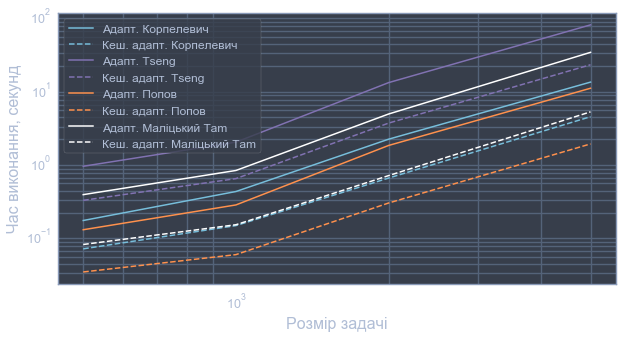

In [36]:
src.save_values_to_image(times, sizes, fn='4/adapt/time',
                         styles=('c-', 'c--', 'm-', 'm--', 'y-', 'y--', 'w-', 'w--'),
                         title='Час виконання, секунд')

In [37]:
def generate_sparse_tridiagonal_matrix(size: int) -> np.matrix:
    data, rows, cols = [], [], []
    for row in range(size):
        if row != 0:
            rows.append(row)
            cols.append(row - 1)
            data.append(1)
        rows.append(row)
        cols.append(row)
        data.append(4)
        if row + 1 != size:
            rows.append(row)
            cols.append(row + 1)
            data.append(-2)
    d = sparse.coo_matrix((data, (rows, cols)), shape=(size, size))
    c = -np.ones(size)
    return d, c

In [38]:
sizes = (20_000, 50_000, 100_000, 200_000)
algos = ('Адапт. Корпелевич', 'Кеш. адапт. Корпелевич',
         'Адапт. Tseng', 'Кеш. адапт. Tseng',
         'Адапт. Попов', 'Кеш. адапт. Попов',
         'Адапт. Маліцький Tam', 'Кеш. адапт. Маліцький Tam')
iters, times = {algo: {} for algo in algos}, {algo: {} for algo in algos}

In [39]:
for size in sizes:
    print(f'Розмір задачі = {size}:')
    d, c = generate_sparse_tridiagonal_matrix(size)

    def f(x: np.array) -> np.array:
        y = np.hstack([[0], x, [0]])
        f1 = y[1:-1] ** 2 + y[:-2] ** 2 + y[1:-1] * y[:-2] + y[1:-1] * y[2:]
        return f1 + d.dot(x) + c

    print('\tАдапт. Корпелевич:', end=' ')
    _, iters['Адапт. Корпелевич'][size], times['Адапт. Корпелевич'][size] = \
          src.adaptive_korpelevich(x_initial=np.zeros(size), tau=.4, lambda_initial=1,
                                   A=f, ProjectionOntoC=lambda x: np.maximum(x, np.zeros(x.shape[0])),
                                   tolerance=1e-6, max_iterations=1e4, debug=True)

    print('\tКеш. адапт. Корпелевич:', end=' ')
    _, iters['Кеш. адапт. Корпелевич'][size], times['Кеш. адапт. Корпелевич'][size] = \
          src.cached_adaptive_korpelevich(x_initial=np.zeros(size), tau=.4, lambda_initial=1,
                                          A=f, ProjectionOntoC=lambda x: np.maximum(x, np.zeros(x.shape[0])),
                                          tolerance=1e-6, max_iterations=1e4, debug=True)

    print('\tАдапт. Tseng:', end=' ')
    _, iters['Адапт. Tseng'][size], times['Адапт. Tseng'][size] = \
          src.adaptive_tseng(x_initial=np.zeros(size), tau=.4, lambda_initial=1,
                             A=f, ProjectionOntoC=lambda x: np.maximum(x, np.zeros(x.shape[0])),
                             tolerance=1e-6, max_iterations=1e4, debug=True)

    print('\tКеш. адапт. Tseng:', end=' ')
    _, iters['Кеш. адапт. Tseng'][size], times['Кеш. адапт. Tseng'][size] = \
          src.cached_adaptive_tseng(x_initial=np.zeros(size), tau=.4, lambda_initial=1,
                                    A=f, ProjectionOntoC=lambda x: np.maximum(x, np.zeros(x.shape[0])),
                                    tolerance=1e-6, max_iterations=1e4, debug=True)

    print('\tАдапт. Попов:', end=' ')
    _, iters['Адапт. Попов'][size], times['Адапт. Попов'][size] = \
          src.adaptive_popov(x_initial=np.zeros(size), y_initial=np.zeros(size),
                             tau=.4, lambda_initial=1,
                             A=f, ProjectionOntoC=lambda x: np.maximum(x, np.zeros(x.shape[0])),
                             tolerance=1e-6, max_iterations=1e4, debug=True)

    print("\tКеш. адапт. Попов: ", end="")
    _, iters['Кеш. адапт. Попов'][size], times['Кеш. адапт. Попов'][size] = \
          src.cached_adaptive_popov(x_initial=np.zeros(size), y_initial=np.zeros(size),
                                    tau=.4, lambda_initial=1,
                                    A=f, ProjectionOntoC=lambda x: np.maximum(x, np.zeros(x.shape[0])),
                                    tolerance=1e-6, max_iterations=1e4, debug=True)

    print('\tАдапт. Маліцький Tam:', end=' ')
    _, iters['Адапт. Маліцький Tam'][size], times['Адапт. Маліцький Tam'][size] = \
          src.adaptive_malitskyi_tam(x0_initial=np.ones(size), x1_initial=np.ones(size),
                                     tau=.4, lambda0_initial=1, lambda1_initial=1,
                                     A=f, ProjectionOntoC=lambda x: np.maximum(x, np.zeros(x.shape[0])),
                                     tolerance=1e-6, max_iterations=1e4, debug=True)

    print('\tКеш. адапт. Маліцький Tam:', end=' ')
    _, iters['Кеш. адапт. Маліцький Tam'][size], times['Кеш. адапт. Маліцький Tam'][size] = \
          src.cached_adaptive_malitskyi_tam(x0_initial=np.ones(size), x1_initial=np.ones(size),
                                            tau=.4, lambda0_initial=1, lambda1_initial=1,
                                            A=f, ProjectionOntoC=lambda x: np.maximum(x, np.zeros(x.shape[0])),
                                            tolerance=1e-6, max_iterations=1e4, debug=True)

    print()


Розмір задачі = 20000:
	Адапт. Корпелевич: Took 74 iterations and 0.16 seconds to converge.
	Кеш. адапт. Корпелевич: Took 74 iterations and 0.07 seconds to converge.
	Адапт. Tseng: Took 388 iterations and 0.93 seconds to converge.
	Кеш. адапт. Tseng: Took 388 iterations and 0.80 seconds to converge.
	Адапт. Попов: Took 71 iterations and 0.33 seconds to converge.
	Кеш. адапт. Попов: Took 71 iterations and 0.10 seconds to converge.
	Адапт. Маліцький Tam: Took 262 iterations and 1.47 seconds to converge.
	Кеш. адапт. Маліцький Tam: Took 262 iterations and 0.43 seconds to converge.

Розмір задачі = 50000:
	Адапт. Корпелевич: Took 76 iterations and 1.31 seconds to converge.
	Кеш. адапт. Корпелевич: Took 76 iterations and 0.48 seconds to converge.
	Адапт. Tseng: Took 399 iterations and 9.64 seconds to converge.
	Кеш. адапт. Tseng: Took 399 iterations and 2.87 seconds to converge.
	Адапт. Попов: Took 73 iterations and 0.79 seconds to converge.
	Кеш. адапт. Попов: Took 73 iterations and 0.24 s

In [40]:
src.save_values_to_table(times, sizes, fn='4/sparse/adapt/time',
                         caption='Час виконання, секунд')
src.save_values_to_table(iters, sizes, fn='4/sparse/adapt/iter',
                         caption='Число ітерацій')

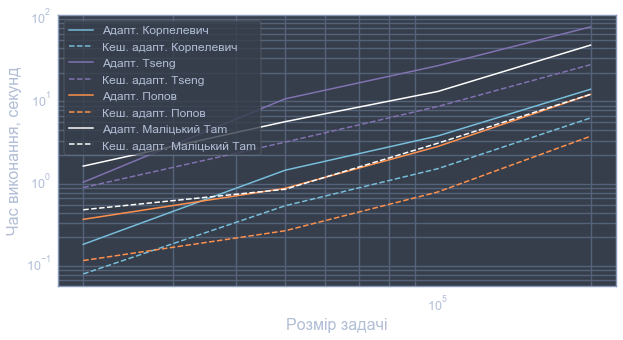

In [41]:
src.save_values_to_image(times, sizes, fn='4/sparse/adapt/time',
                         styles=('c-', 'c--', 'm-', 'm--', 'y-', 'y--', 'w-', 'w--'),
                         title='Час виконання, секунд')